In [18]:
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

## Python API
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

As an example, let's look at the GWA-T-12 Bitbrains dataset from TU Delft
The dataset contains the performance metrics of 1,750 VMs from a distributed datacenter from Bitbrains, which is a service provider that specializes in managed hosting and business computation for enterprises. Customers include many major banks (ING), credit card operators (ICS), insurers (Aegon), etc. Bitbrains hosts applications used in the solvency domain; examples of application vendors are Towers Watson and Algorithmics. These applications are typically used for financial reporting, which is used predominately at the end of financial quarters. T

he full CSV dataset is available here. (http://gwa.ewi.tudelft.nl/datasets/gwa-t-12-bitbrains)

Each file contains the performance metrics of a VM. 

First we'll import the data:

In [19]:
import pandas as pd
from fbprophet import Prophet

In [20]:
df = pd.read_csv('./data/61.csv', sep=";")
df.head()

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,1,2599.999304,17.333329,0.666667,2097152.0,157984.800000,0.0,7.800000,0.0,0.266667
1,1376315146,1,2599.999304,17.333329,0.666667,2097152.0,160780.266667,0.0,7.533333,0.0,0.133333
2,1376315446,1,2599.999304,17.333329,0.666667,2097152.0,173362.133333,0.0,7.133333,0.0,0.200000
3,1376315746,1,2599.999304,22.533327,0.866667,2097152.0,226489.866667,0.0,9.000000,0.0,0.666667
4,1376316046,1,2599.999304,20.799994,0.800000,2097152.0,176159.733333,0.0,7.066667,0.0,0.200000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 11 columns):
Timestamp [ms]                            1105 non-null int64
	CPU cores                                1105 non-null int64
	CPU capacity provisioned [MHZ]           1105 non-null float64
	CPU usage [MHZ]                          1105 non-null float64
	CPU usage [%]                            1105 non-null float64
	Memory capacity provisioned [KB]         1105 non-null float64
	Memory usage [KB]                        1105 non-null float64
	Disk read throughput [KB/s]              1105 non-null float64
	Disk write throughput [KB/s]             1105 non-null float64
	Network received throughput [KB/s]       1105 non-null float64
	Network transmitted throughput [KB/s]    1105 non-null float64
dtypes: float64(9), int64(2)
memory usage: 95.0 KB


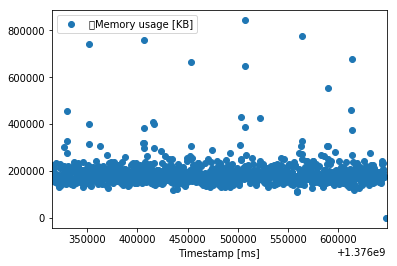

In [22]:
df.plot(x='Timestamp [ms]', y='	Memory usage [KB]', style='o')

In [25]:
new = df[['Timestamp [ms]', '	Memory usage [KB]']].copy()
df['ds'] = pd.to_datetime(df['Timestamp [ms]'])
new.rename(columns={'	Memory usage [KB]':'y'}, inplace=True)

new.head()

,Timestamp [ms],y
0,1376314846,157984.800000
1,1376315146,160780.266667
2,1376315446,173362.133333
3,1376315746,226489.866667
4,1376316046,176159.733333


In [ ]:
m = Prophet()
m.fit(df)